In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set()

In [3]:
df_hotels = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-11/hotels.csv')

In [4]:
df_hotels

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [5]:
df_hotels = df_hotels.reset_index().rename(columns={'index':'id'})

Create a function with one argument formed in DataFrame to check the data type, the number of null values, the percentage of null values and the number of unique values for each column!


In [6]:
def check_values(df):
    data = []
    for column in df.columns:
      data.append([
                  column, \
                  df[column].dtype, \
                  df[column].isna().sum(), \
                  round(100*(df[column].isna().sum()/len(df)),2), \
                  df[column].nunique()
                  ])
    return pd.DataFrame(columns=['Data_Features','Data_Type','Null','Null_Percentage','Unique_Value'], data=data)

In [7]:
check_values(df_hotels)

,Data_Features,Data_Type,Null,Null_Percentage,Unique_Value
0,id,int64,0,0.00,119390
1,hotel,object,0,0.00,2
2,is_canceled,int64,0,0.00,2
3,lead_time,int64,0,0.00,479
4,arrival_date_year,int64,0,0.00,3
5,arrival_date_month,object,0,0.00,12
6,arrival_date_week_number,int64,0,0.00,53
7,arrival_date_day_of_month,int64,0,0.00,31
8,stays_in_weekend_nights,int64,0,0.00,17
9,stays_in_week_nights,int64,0,0.00,35


How many visitors are there who cancel the reservation and who don’t? And from that number draw conclusions about the proportions of each!

In [8]:
df_hotels.is_canceled.value_counts()

is_canceled
0    75166
1    44224
Name: count, dtype: int64

In [9]:
df_hotels.is_canceled.value_counts(normalize=True)

is_canceled
0    0.629584
1    0.370416
Name: proportion, dtype: float64

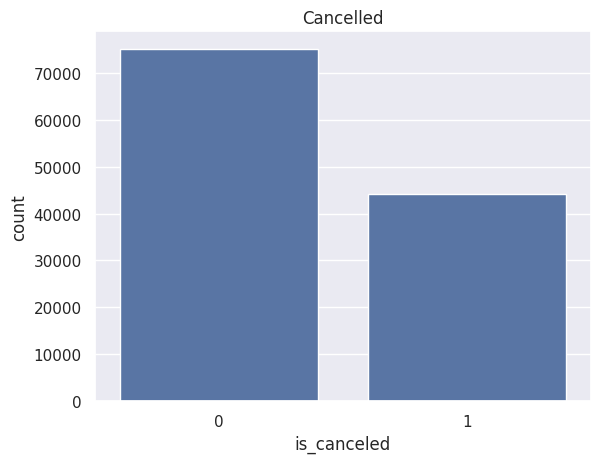

In [10]:
sns.countplot(data=df_hotels, x='is_canceled')
plt.title('Cancelled')
plt.show()

a) For “City Hotel”, what is the percentage of canceled reservations?
b) For “Resort Hotel”, what is the percentage of canceled reservations?
c) What type of hotel that has the bigger percentage of canceled reservations?

In [11]:
round(100*(len(df_hotels[(df_hotels.hotel=='City Hotel')&(df_hotels.is_canceled==1)])/len(df_hotels[df_hotels.hotel=='City Hotel'])),2)

41.73

In [12]:
round(100*(len(df_hotels[(df_hotels.hotel=='Resort Hotel')&(df_hotels.is_canceled==1)])/len(df_hotels[df_hotels.hotel=='Resort Hotel'])),2)

27.76

Filter data so that it only displays the visitors who don’t cancel the reservation and save the result in df_checkout variable!

In [13]:
df_checkout = df_hotels[df_hotels.is_canceled==0]

a) Show the number of reservations per month of arrival for each type of hotel!
b) Then in which month there are the most reservations in each type of hotel? Make a conclusion whether the trend is the same in both types of hotels?
c) Do as point B but with the name of the month that has been mapped into months in numbers!

note: for this and subsequent questions will use the df_checkout dataframe.

In [14]:
df_checkout.groupby(['hotel','arrival_date_month'])['id'].nunique()

hotel         arrival_date_month
City Hotel    April                 4015
              August                5381
              December              2392
              February              3064
              January               2254
              July                  4782
              June                  4366
              March                 4072
              May                   4579
              November              2696
              October               4337
              September             4290
Resort Hotel  April                 2550
              August                3257
              December              2017
              February              2308
              January               1868
              July                  3137
              June                  2038
              March                 2573
              May                   2535
              November              1976
              October               2577
              September 

In [15]:
import calendar

month_dict = {month: index for index, month in enumerate(calendar.month_name) if month}
month_dict

df_checkout['arrival_date_month_number'] = df_checkout['arrival_date_month'].map(month_dict)

<ipython-input-15-6b98ddae6109>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['arrival_date_month_number'] = df_checkout['arrival_date_month'].map(month_dict)


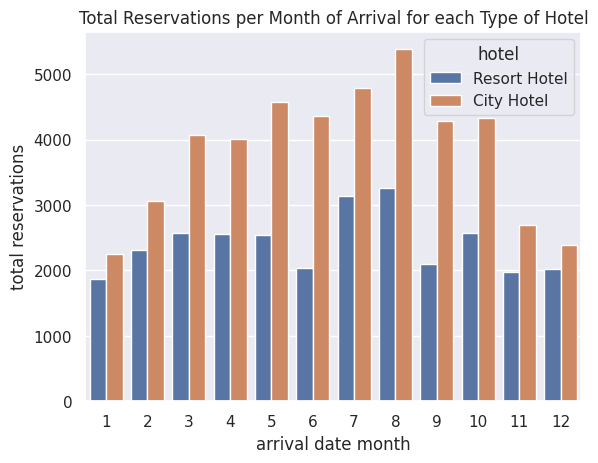

In [16]:
sns.countplot(data=df_checkout, x='arrival_date_month_number',hue='hotel')
plt.xlabel('arrival date month')
plt.ylabel('total reservations')
plt.title('Total Reservations per Month of Arrival for each Type of Hotel')
plt.show()

a) Create a new column named arrival_date which contains complete information about the year, month, and date of arrival!
b) Change the column to datetime type!

In [17]:
df_checkout['arrival_date'] = \
  df_checkout['arrival_date_year'].astype('str') + '-' +\
  df_checkout.arrival_date_month_number.astype('str').str.pad(2,fillchar='0') + '-' +\
  df_checkout.arrival_date_day_of_month.astype('str').str.pad(2,fillchar='0')

<ipython-input-17-4f63a135dd3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['arrival_date'] = \


In [18]:
df_checkout['arrival_date']

0         2015-07-01
1         2015-07-01
2         2015-07-01
3         2015-07-01
4         2015-07-01
             ...    
119385    2017-08-30
119386    2017-08-31
119387    2017-08-31
119388    2017-08-31
119389    2017-08-29
Name: arrival_date, Length: 75166, dtype: object

In [19]:
df_checkout['arrival_date'] = pd.to_datetime(df_checkout.arrival_date)
df_checkout['arrival_date']

<ipython-input-19-d3e0ab67e8ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['arrival_date'] = pd.to_datetime(df_checkout.arrival_date)


0        2015-07-01
1        2015-07-01
2        2015-07-01
3        2015-07-01
4        2015-07-01
            ...    
119385   2017-08-30
119386   2017-08-31
119387   2017-08-31
119388   2017-08-31
119389   2017-08-29
Name: arrival_date, Length: 75166, dtype: datetime64[ns]

Create two dataframe containing:
a) Daily reservation (df_daily_reservation)
b) Average of daily reservation per week (df_avg_daily_reservation_per_week)

In [20]:
df_daily_reservation = df_checkout.resample('D', on='arrival_date').size().reset_index().rename(columns={0:'daily_reservation'})
df_daily_reservation

,arrival_date,daily_reservation
0,2015-07-01,103
1,2015-07-02,36
2,2015-07-03,37
3,2015-07-04,45
4,2015-07-05,37
...,...,...
788,2017-08-27,125
789,2017-08-28,147
790,2017-08-29,81
791,2017-08-30,62


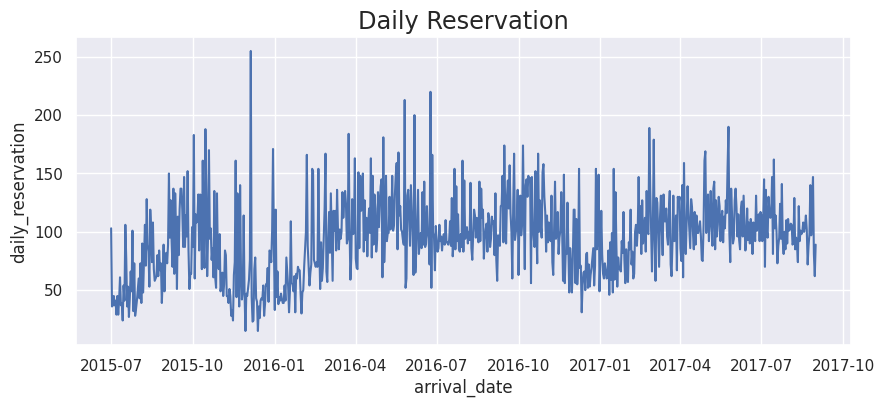

In [21]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df_daily_reservation, x='arrival_date', y='daily_reservation')
plt.title('Daily Reservation', fontsize='x-large')
plt.show()

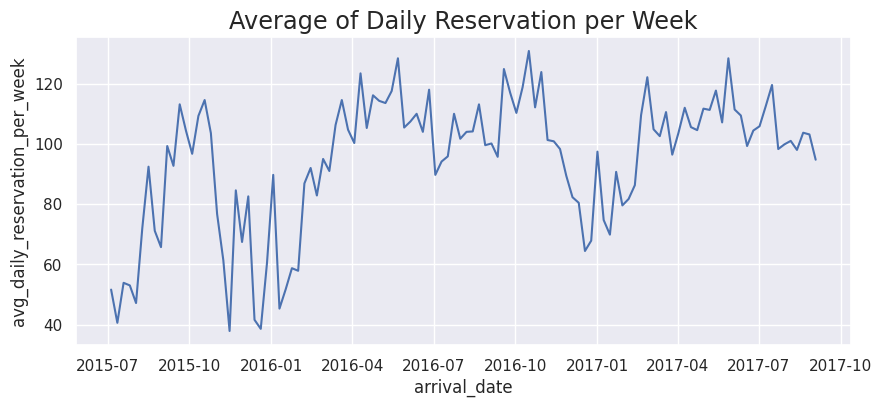

In [23]:
df_avg_daily_reservation_per_week = round(df_checkout.resample('D', on='arrival_date').size().reset_index().rename(columns={0:'avg_daily_reservation_per_week'}).resample('W', on='arrival_date')['avg_daily_reservation_per_week'].mean().reset_index(),2)
df_avg_daily_reservation_per_week
plt.figure(figsize=(10,4))
sns.lineplot(data=df_avg_daily_reservation_per_week, x='arrival_date', y='avg_daily_reservation_per_week')
plt.title('Average of Daily Reservation per Week', fontsize='x-large')
plt.show()

a) What is the average ADR (Average Daily Rate) based on hotel type and customer type?
b) Which type of customer has the highest the average of ADR in each type of hotel?

In [24]:
round(df_checkout.groupby(['hotel','customer_type'])['adr'].mean(),2)

hotel         customer_type  
City Hotel    Contract           108.93
              Group               87.40
              Transient          110.42
              Transient-Party     93.71
Resort Hotel  Contract            78.58
              Group               77.31
              Transient           96.00
              Transient-Party     77.20
Name: adr, dtype: float64

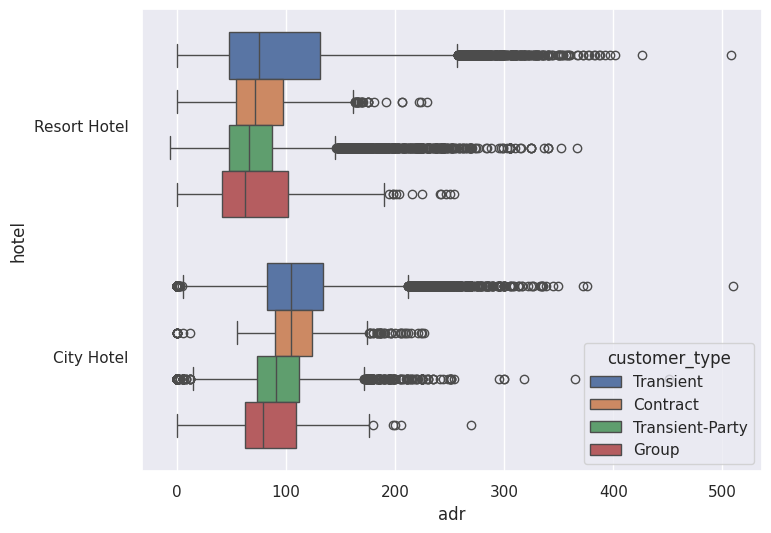

In [25]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_checkout, x='adr', y='hotel',hue='customer_type')
plt.show()

By using the ‘df_country’ dataframe which contains the country name and country code information, show the 10 countries with the largest number of reservations!

In [26]:
df_country = pd.read_csv('https://gist.githubusercontent.com/tadast/8827699/raw/f5cac3d42d16b78348610fc4ec301e9234f82821/countries_codes_and_coordinates.csv')

In [27]:
df_country['code'] = df_country['Alpha-3 code'].str.replace('"','').str.strip()

In [28]:
df_merged = pd.merge(df_checkout[['id','country']],
                     df_country[['Country','code']],
                     left_on='country',
                     right_on='code',
                     indicator=True,
                     how='left')
df_merged

,id,country,Country,code,_merge
0,0,PRT,Portugal,PRT,both
1,1,PRT,Portugal,PRT,both
2,2,GBR,United Kingdom,GBR,both
3,3,GBR,United Kingdom,GBR,both
4,4,GBR,United Kingdom,GBR,both
...,...,...,...,...,...
75712,119385,BEL,Belgium,BEL,both
75713,119386,FRA,France,FRA,both
75714,119387,DEU,Germany,DEU,both
75715,119388,GBR,United Kingdom,GBR,both


In [29]:
df_merged.Country.value_counts().head(10)

Country
Portugal          21071
United Kingdom     9676
France             8481
Spain              6391
Germany            6069
Ireland            2543
Italy              2433
Belgium            1868
Netherlands        1717
United States      1596
Name: count, dtype: int64

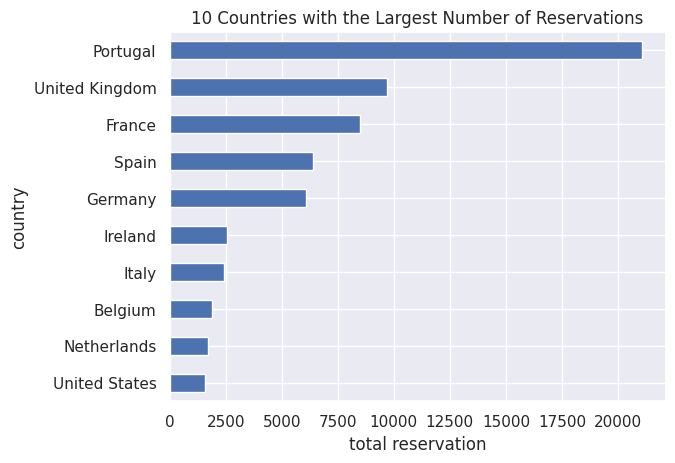

In [30]:
df_merged.Country.value_counts().head(10).sort_values(ascending=True).plot.barh()
plt.xlabel('total reservation')
plt.ylabel('country')
plt.title('10 Countries with the Largest Number of Reservations')
plt.show()

a) How many average guests stay for each reservation?
b) Based on the dataset, what is the highest number of guests? Also show the reservation data row that has the highest number of guests.

In [31]:
df_checkout['total_guest'] = df_checkout.adults + df_checkout.children + df_checkout.babies

<ipython-input-31-866bec18a6af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['total_guest'] = df_checkout.adults + df_checkout.children + df_checkout.babies


In [32]:
round(df_checkout.total_guest.mean(),0)

2.0

In [33]:
df_checkout.total_guest.max()

12.0

In [34]:
df_checkout[df_checkout.total_guest==df_checkout.total_guest.max()].T

,46619
id,46619
hotel,City Hotel
is_canceled,0
lead_time,37
arrival_date_year,2016
arrival_date_month,January
arrival_date_week_number,3
arrival_date_day_of_month,12
stays_in_weekend_nights,0
stays_in_week_nights,2
